# Proyecto: Webscrapping página de Banxico

### Andrés Nieto Guadarrama
### 000119266

Librerías necesarias:

In [353]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests_html
import pickle
import numpy as np
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime

Formato para gráficos:

In [354]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 4)

URL con la información de política monetaria de BANXICO: (guardada como tupla)

In [355]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

### Ejercicio 1

In [356]:
#Lectura de la página
with HTMLSession() as sess:
    r = sess.get(url)
r

filename="andres_nieto"
outfile = open(filename,'wb')

In [357]:
mi_dict_auxiliar=defaultdict(list)

tablas=r.html.find("tbody", first=True)
trs=tablas.find("tr")
cont=0
for tr in trs:
    
    fecha=datetime.strptime(tr.find("span",first=True).text, '%d/%m/%y')
    resumen=tr.find("td[class='bmtextview']",first=True).text.rstrip('Texto completo')
    link,*_=tr.find("td[class='bmtextview']",first=True).absolute_links

    if fecha.year>2008:
    
        mi_dict_auxiliar['Fecha'].append(datetime.strptime(fecha.strftime("%y-%m-%d"),"%y-%m-%d"))
        mi_dict_auxiliar['Resumen'].append(resumen)
        mi_dict_auxiliar['Link'].append(link)
    
    elif fecha.month>=2:
        
        mi_dict_auxiliar['Fecha'].append(datetime.strptime(fecha.strftime("%y-%m-%d"),"%y-%m-%d"))
        mi_dict_auxiliar['Resumen'].append(resumen)
        mi_dict_auxiliar['Link'].append(link)
    
    else: 
        
        break
    
df=pd.DataFrame(mi_dict_auxiliar)
banxico_df=df.iloc[::-1]
#-------------------------------------------------DataFrame resultado----------------------------------------------------------
banxico_df.head(5)

,Fecha,Resumen,Link
103,2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
102,2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
101,2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
100,2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
99,2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


# Ejercicio 2

In [358]:
aux=banxico_df['Resumen'].str.extract(r"(mantiene|incrementa|disminuye)",expand=False)
banxico_df_ej2=banxico_df
banxico_df_ej2.insert(loc=3,column="Categoría",value=list(aux))

In [359]:
banxico_df_ej2.head(5)

,Fecha,Resumen,Link,Categoría
103,2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
102,2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
101,2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
100,2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
99,2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa


# Ejercicio 3

¿En cuantas decisiones de política monetaria el Banco de México se incrementó, mantuvo o disminuyó la tasa de referencia?

In [360]:
arr=np.array(banxico_df["Categoría"])
llaves=['mantiene','incrementa','disminuye']
diccionario_numero_cambios={l:sum(arr==l) for l in llaves}
diccionario_numero_cambios

{'mantiene': 72, 'incrementa': 18, 'disminuye': 14}

# Ejercicio 4

In [361]:
'''
Gráfica 1
'''

cat=[]
for i in list(banxico_df.index):
    if banxico_df["Categoría"][i]=="disminuye":
        cat.append(-1)
    elif banxico_df["Categoría"][i]=="mantiene":
        cat.append(0)
    else:
        cat.append(1)
banxico_df_ej2["cat_values"]=cat

'''
Gráfica 2
'''

df_graficas=pd.DataFrame({"conteo":list(diccionario_numero_cambios.values())},index=list(diccionario_numero_cambios.keys()))


C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


### Graficación

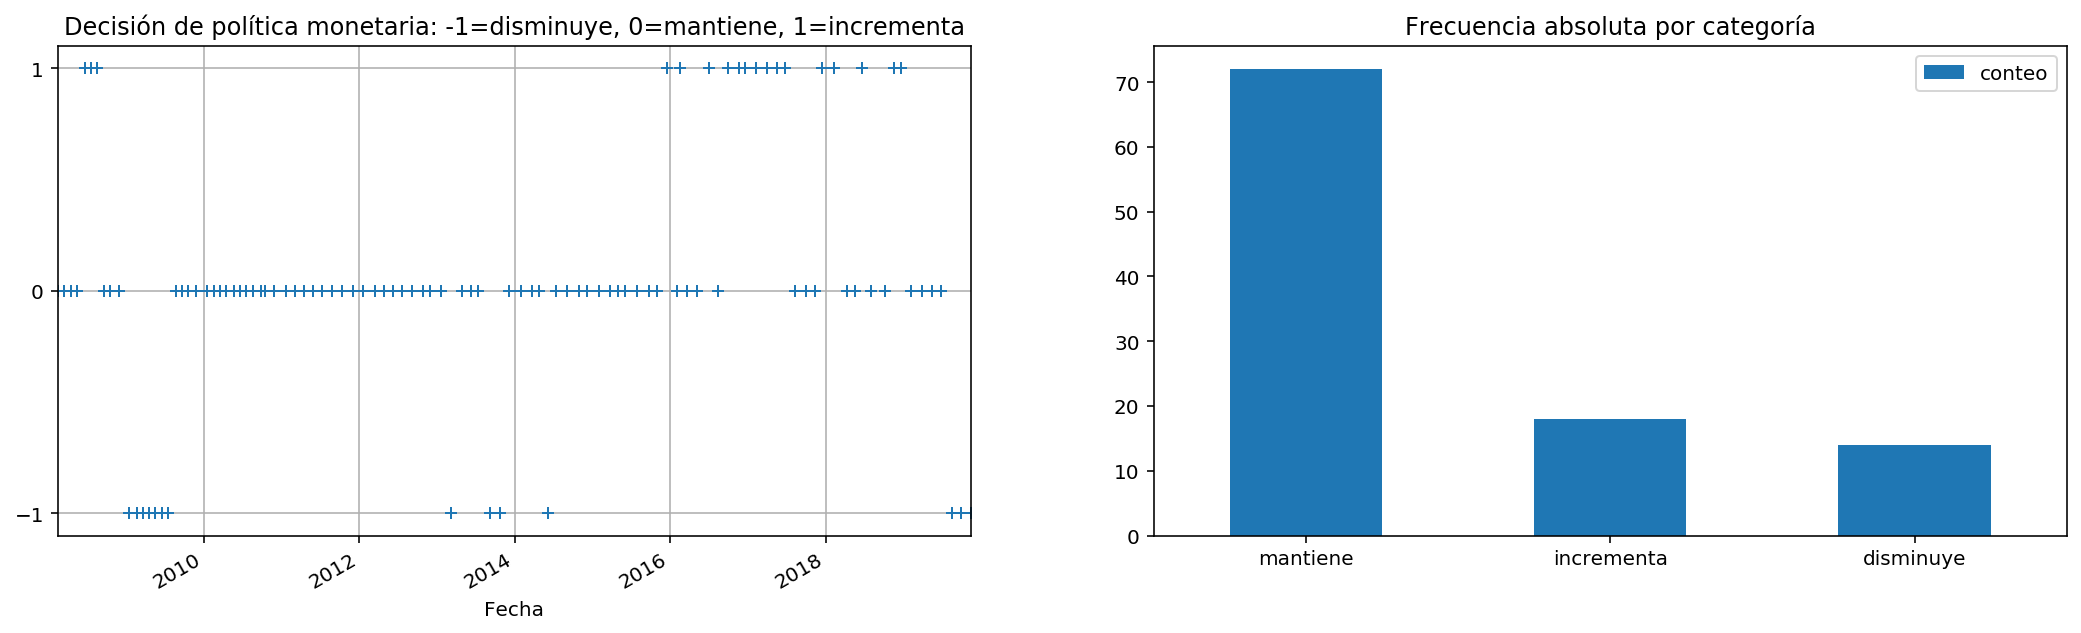

In [401]:

fig, ax = plt.subplots(1,2, figsize=(18, 5))
banxico_df.plot(ax=ax[0],x="Fecha",y="cat_values",style="+",yticks=[-1,0,1],grid=True,title="Decisión de política monetaria: -1=disminuye, 0=mantiene, 1=incrementa")
ax[0].get_legend().remove()
df_graficas.plot.bar(ax=ax[1],rot=0,title="Frecuencia absoluta por categoría")
plt.show()

# Ejercicio 5

In [363]:
df_test=banxico_df

df_test.index=df_test["Fecha"]

grouper = df_test.groupby([pd.Grouper(freq='Y'), 'Categoría'])

df_anual=grouper['Categoría'].count()

df_anual

Fecha       Categoría 
2008-12-31  incrementa     3
            mantiene       7
2009-12-31  disminuye      7
            mantiene       4
2010-12-31  mantiene      11
2011-12-31  mantiene       8
2012-12-31  mantiene       8
2013-12-31  disminuye      3
            mantiene       5
2014-12-31  disminuye      1
            mantiene       7
2015-12-31  incrementa     1
            mantiene       7
2016-12-31  incrementa     5
            mantiene       4
2017-12-31  incrementa     5
            mantiene       3
2018-12-31  incrementa     4
            mantiene       4
2019-12-31  disminuye      3
            mantiene       4
Name: Categoría, dtype: int64

# Ejercicio 6

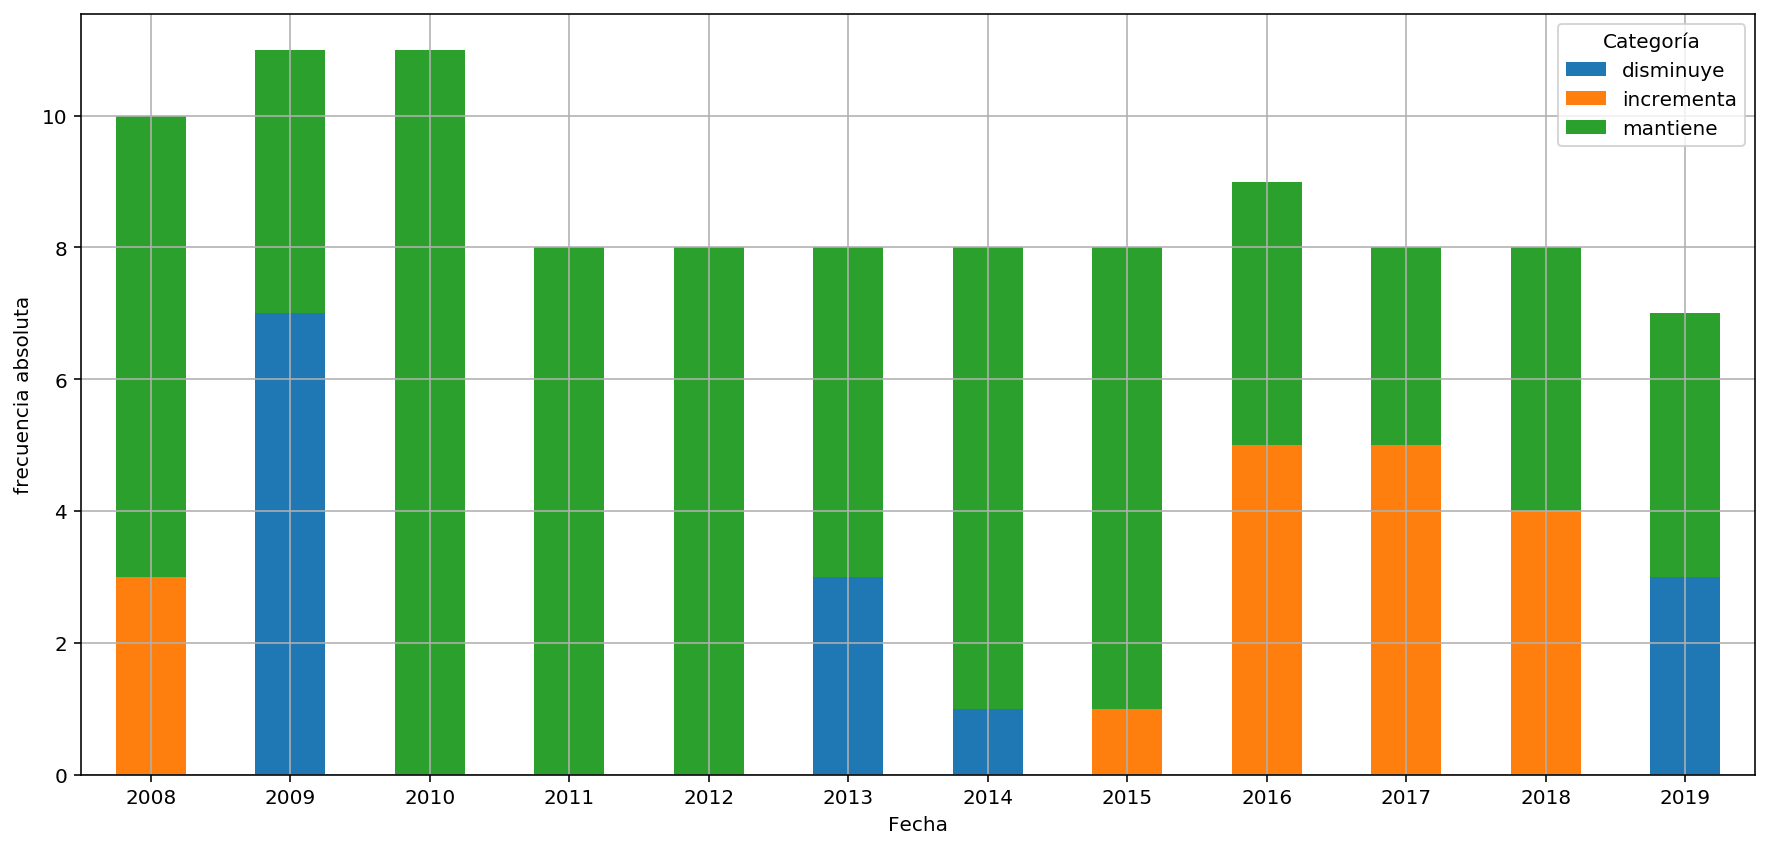

In [409]:
df_anual2=df_anual.unstack('Categoría')
fig2, ax2 = plt.subplots(figsize=(15,7))
df_anual2.plot(rot=0,kind='bar', stacked=True,ax=ax2,grid=True)
ax2.set_xticklabels(list(range(2008,2020)), rotation=0)
ax2.set_ylabel("frecuencia absoluta")
plt.show()

# Creación del archivo .pkl

In [374]:
import pickle
filename="andres_nieto.pkl"

In [430]:
'''
Crearemos dos funciones para almacenar las gráficas en el pickle:
'''

def fig_1(banxico_df,df_graficas):
    fig, ax = plt.subplots(1,2, figsize=(18, 5))
    banxico_df.plot(ax=ax[0],x="Fecha",y="cat_values",style="+",yticks=[-1,0,1],grid=True,title="Decisión de política monetaria: -1=disminuye, 0=mantiene, 1=incrementa")
    ax[0].get_legend().remove()
    df_graficas.plot.bar(ax=ax[1],rot=0,title="Frecuencia absoluta por categoría")
    plt.show()

def fig_2(df_anual):
    df_anual2=df_anual.unstack('Categoría')
    fig2, ax2 = plt.subplots(figsize=(15,7))
    df_anual2.plot(rot=0,kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_xticklabels(list(range(2008,2020)), rotation=0)
    ax2.set_ylabel("frecuencia absoluta")
    plt.show()


In [431]:
'''
Los datos se almacenarán en un diccionario con las siguientes llaves: 
BANXICO: banxico_dataframe. Dataframe con el webscripping y la columna de categoría.
ANUAL: la sub_dataframe con el conteo de las categorías 'disminuye', 'mantiene' o 'incrementa' agrupadas por año.
GRAFICAS: Resume conteo de categorías sin agrupar, para generar la primera gráfica de barras.
figura_1: función para crear la primera figura de la tarea. LLamar con BANXICO y GRAFICAS.
figura_2: función para crear la segunda figura de la tarea. LLamar con ANUAL.

Seguir éste orden al leer el archivo .pkl
'''

"\nLos datos se almacenarán en un diccionario con las siguientes llaves: \nBANXICO: banxico_dataframe. Dataframe con el webscripping y la columna de categoría.\nANUAL: la sub_dataframe con el conteo de las categorías 'disminuye', 'mantiene' o 'incrementa' agrupadas por año.\nGRAFICAS: Resume conteo de categorías sin agrupar, para generar la primera gráfica de barras.\nfigura_1: función para crear la primera figura de la tarea. LLamar con BANXICO y GRAFICAS.\nfigura_2: función para crear la segunda figura de la tarea. LLamar con ANUAL.\n\nSeguir éste orden al leer el archivo .pkl\n"

In [432]:
import dill as pickl
data={"BANXICO":banxico_df,"ANUAL":df_anual,"GRAFICAS":df_graficas,"figura_1":fig_1,"figura_2":fig_2}

In [433]:
with open(filename, "wb") as f:
    pickl.dump(data, f)

# Comprobación (en notebook lectura_pickles.ipynb)